In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from a2c.a2c import A2C
from environments.continuous_teaching import ContinuousTeaching

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching
from human_agents import generate_agents
from visualization_utils.episode_runs import run_one_episode


from baseline_policies.conservative import Conservative 


In [45]:
# exp1=A2C.load('runs/discont_exp/run_1')
# exp15=A2C.load('runs/discont_exp/run_1.5')
# exp2=A2C.load('runs/discont_exp/run_2')
# exp3=A2C.load('runs/discont_exp/run_3')
# exp4=A2C.load('runs/discont_exp/run_4')
pen1 = A2C.load('runs/eb_pen/eb_run_1')
pen2 = A2C.load('runs/eb_pen/eb_run_2')
pen15 = A2C.load('runs/eb_pen/eb_run_0.5')
pen3 = A2C.load('runs/eb_pen/eb_run_3')
pen20 = A2C.load('runs/eb_pen/eb_run_20')
monotonic1 = A2C.load('runs/eb_pen/monotonic_run_1')
monotonic2 = A2C.load('runs/eb_pen/monotonic_run_2')
monotonic3 = A2C.load('runs/eb_pen/monotonic_run_3')
monotonic5 = A2C.load('runs/eb_pen/monotonic_run_0.5')

In [47]:
model=pen20
env1=model.env
env1.t_max = 600
model.env.gamma

20

In [48]:
env = DiscontinuousTeaching(
    tau=0.9,
    break_length=24 * 60 ** 2,
    time_per_iter=3,
    n_iter_per_session=100,
    initial_forget_rates=model.env.all_forget_rates,
    initial_repetition_rates=model.env.all_repetition_rates,
    delta_coeffs=np.array([3, 20]),
    n_item=pen1.env.n_item,
    penalty_coeff=0.2,
    reward_type=4,
)

In [63]:
rewards, actions=run_one_episode(env, model, 4)

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1678.74it/s]

a2c | final reward 69 | precision 2.19


In [16]:
# monotonic case
b = [0]
for x in rewards:
    b += [b[-1] + x]

In [64]:
# exponential case
rewards = np.log10(np.array(rewards)) * env1.n_item

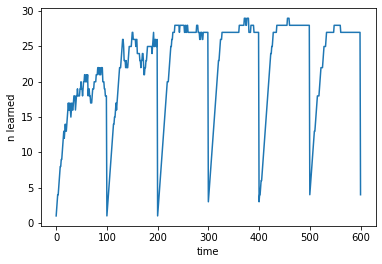

In [65]:
n_learned = np.array(rewards)#/20*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

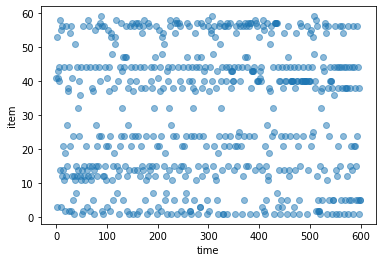

In [52]:
fig, ax = plt.subplots()
ax.scatter(np.arange(env1.t_max), actions, alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("item");

In [48]:
env1.obs[0]

array([0.        , 0.        , 0.17122265])

In [67]:
policy = Conservative(env=env)
# rewards2, actions2 = run_one_episode(env1, policy, is_a2c=False)

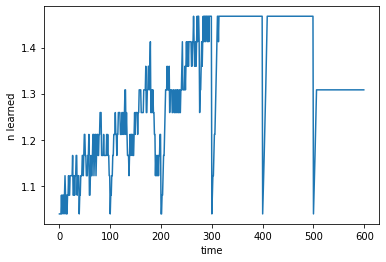

In [130]:
n_learned = np.array(rewards2)#*env1.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

In [10]:
model=exp1

In [72]:
ms = [monotonic5, monotonic1, monotonic2, monotonic3]
labels = [0.5, 1, 2, 3]

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1539.97it/s]


a2c | final reward 67 | precision 1.35


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1837.70it/s]


a2c | final reward 69 | precision 4.11


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1719.73it/s]


a2c | final reward 62 | precision 4.16


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1775.78it/s]


a2c | final reward 84 | precision 2.92


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1679.77it/s]


a2c | final reward 72 | precision 1.43


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1845.24it/s]


a2c | final reward 69 | precision 4.11


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1841.83it/s]


a2c | final reward 62 | precision 4.16


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1835.39it/s]


a2c | final reward 69 | precision 2.41


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1656.42it/s]


a2c | final reward 88 | precision 1.73


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1721.50it/s]


a2c | final reward 78 | precision 4.62


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1579.38it/s]


a2c | final reward 75 | precision 5.04


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1751.03it/s]


a2c | final reward 78 | precision 2.80


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1610.56it/s]


a2c | final reward 81 | precision 1.60


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1439.14it/s]


a2c | final reward 69 | precision 4.11


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1689.48it/s]


a2c | final reward 69 | precision 4.66


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1535.26it/s]


a2c | final reward 75 | precision 2.70


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1714.55it/s]


a2c | final reward 67 | precision 1.35


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1667.84it/s]


a2c | final reward 64 | precision 4.05


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1167.58it/s]


a2c | final reward 64 | precision 4.32


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1843.19it/s]

a2c | final reward 69 | precision 2.50


Text(0.5, 0.98, 'Forget: 0.005898177679697213, \n Repetition: 0.38673813712755295')

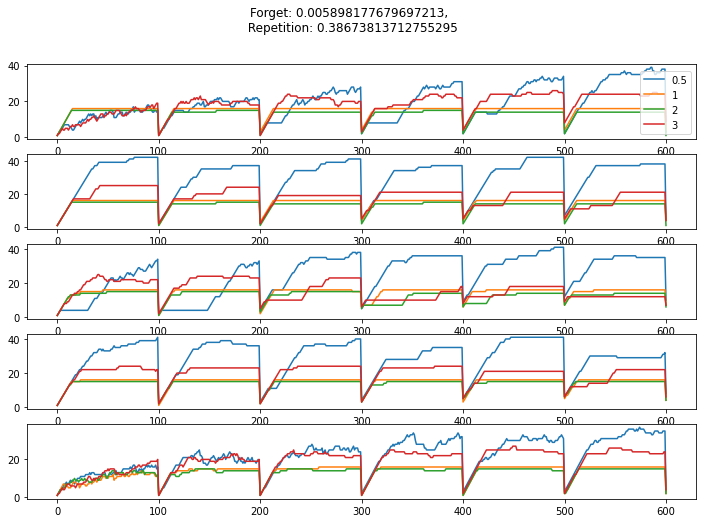

In [73]:
fig, axs = plt.subplots(5, figsize=(12, 8))
for i in range(5):
    for j in range(len(ms)):
        r1, a1 = run_one_episode(env, ms[j], i)
        r1 = np.log10(np.array(r1)) * env.n_item
#         nl1 = np.array(r1)#*env.n_item
    #     nl1 = np.log10(nl1) * env1.n_item
        axs[i].plot(r1, label=labels[j])
#         print('a2c', np.sum(nl1))

#         r2, a2 = run_one_episode(env1, policy, i)
#         nl2 = np.array(r2)#*env.n_item
#     #     nl2 = np.log10(nl2) * env1.n_item
#         axs[i].plot(nl2, color='r', label='Conservative')
#         axs[i].set_ylim(0,60)
#         print('cons', np.sum(nl2))
        
axs[0].legend()

fig.suptitle('Forget: {}, \n Repetition: {}'.format(env1.all_forget_rates.mean(), env1.all_repetition_rates.mean()))
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

In [70]:
env1=env

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1851.17it/s]


a2c | final reward 72 | precision 2.20
a2c 11263.0


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 90.73it/s]


conservative | final reward 88 | precision 8.01
cons 6355.0


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1613.74it/s]


a2c | final reward 72 | precision 2.20
a2c 11263.0


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 92.45it/s]


conservative | final reward 88 | precision 8.01
cons 6355.0


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1842.13it/s]


a2c | final reward 119 | precision 3.86
a2c 13762.0


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 87.40it/s]


conservative | final reward 257 | precision 6.79
cons 19739.0


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1842.15it/s]


a2c | final reward 88 | precision 2.75
a2c 13255.0


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 86.89it/s]


conservative | final reward 119 | precision 6.30
cons 10756.0


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1856.84it/s]


a2c | final reward 69 | precision 2.19
a2c 13352.0


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 89.57it/s]

conservative | final reward 84 | precision 9.42
cons 5233.0


Text(0.5, 0.98, 'Forget: 0.005898177679697213, \n Repetition: 0.38673813712755295')

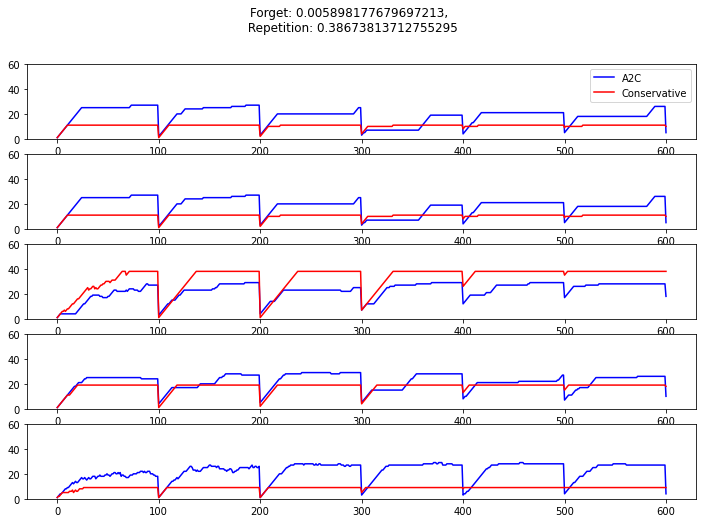

In [71]:
## A2C and Conservative
fig, axs = plt.subplots(5, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    nl1 = np.array(r1)#*env.n_item
    nl1 = np.log10(nl1) * env1.n_item
    axs[i].plot(nl1, color='b', label='A2C')
    print('a2c', np.sum(nl1))
    
    r2, a2 = run_one_episode(env1, policy, i)
    nl2 = np.array(r2)#*env.n_item
    nl2 = np.log10(nl2) * env1.n_item
    axs[i].plot(nl2, color='r', label='Conservative')
    axs[i].set_ylim(0,60)
    print('cons', np.sum(nl2))
        
axs[0].legend()

fig.suptitle('Forget: {}, \n Repetition: {}'.format(env1.all_forget_rates.mean(), env1.all_repetition_rates.mean()))
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1539.69it/s]


a2c | final reward -1860 | precision -36.47
a2c 7


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 66.66it/s]


conservative | final reward -60 | precision -5.45
cons 10


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1316.09it/s]


a2c | final reward -1860 | precision -36.47
a2c 7


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 67.50it/s]


conservative | final reward -60 | precision -5.45
cons 10


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1422.52it/s]


a2c | final reward -1740 | precision -36.25
a2c 11


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 68.83it/s]


conservative | final reward 0 | precision 0.00
cons 38


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1400.22it/s]


a2c | final reward -2280 | precision -44.71
a2c 9


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 69.52it/s]


conservative | final reward -60 | precision -3.16
cons 18


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1353.68it/s]


a2c | final reward -2100 | precision -42.86
a2c 3


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 69.60it/s]


conservative | final reward 0 | precision 0.00
cons 9


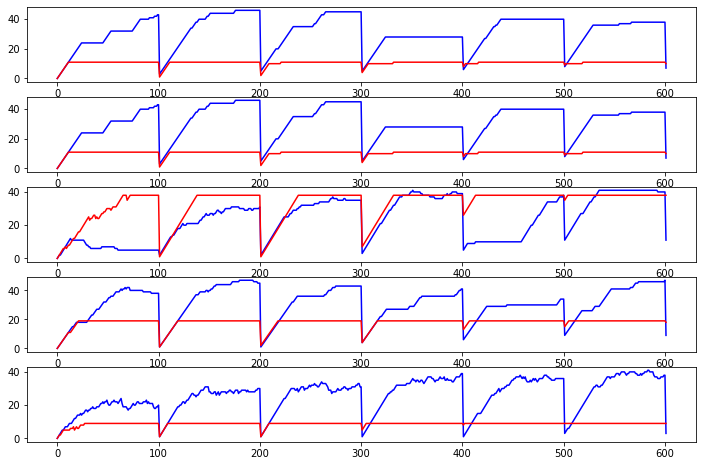

In [30]:
# monotonic case

fig, axs = plt.subplots(5, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env, model, i)
    nl1 = np.array(r1)#*env.n_item
#     nlp1 = nl1[nl1>0]
    b = [0]
    for x in nl1:
        b += [b[-1] + x]
    print('a2c', b[-1])
    axs[i].plot(b, color='b', label='A2C')
    r2, a2 = run_one_episode(env, policy, i)
    nl2 = np.array(r2)#*env.n_item
#     nlp2 = nl2[nl2>0]
    b = [0]
    for x in nl2:
        b += [b[-1] + x]
    print('cons', b[-1])
    axs[i].plot(b, color='r', label='Conservative')
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

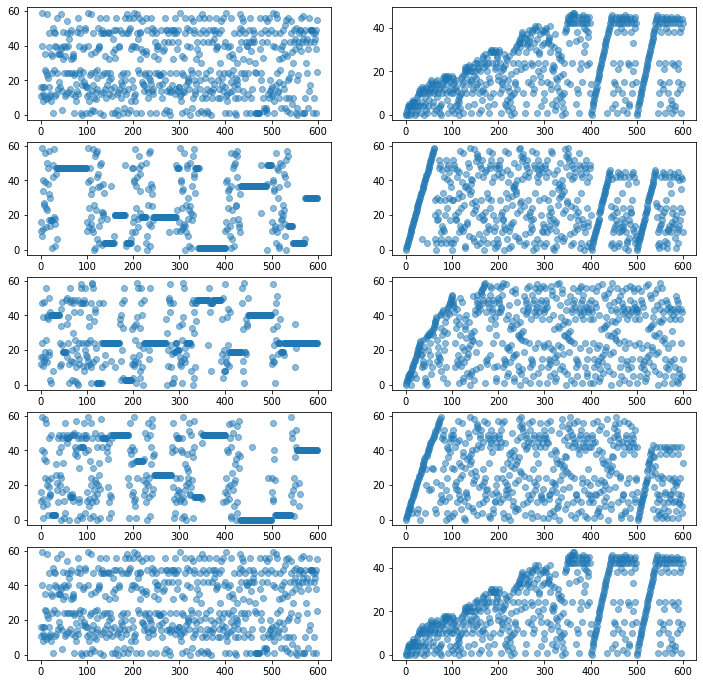

In [249]:
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    axs[i, 0].scatter(np.arange(env1.t_max), a1, alpha=0.5)
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    axs[i, 1].scatter(np.arange(env1.t_max), a2, alpha=0.5)